In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris=load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [58]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [59]:
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [60]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [61]:
iris_df['target']=iris.target
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [62]:
model=RandomForestClassifier(n_estimators=10)
x=iris_df.drop('target',axis=1)
y=iris_df.target
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [63]:
model.score(X_test,y_test)

0.9

In [64]:
print("Actual:",iris.target[54])
iris.data[54]

Actual: 1


array([6.5, 2.8, 4.6, 1.5])

In [65]:
model.predict([iris.data[54]])

f:\Code\ML_Exercise\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [66]:
y_predicted=model.predict(X_test)
cm=confusion_matrix(y_test,y_predicted)
cm

array([[ 7,  0,  0],
       [ 0, 10,  1],
       [ 0,  2, 10]], dtype=int64)

Text(50.722222222222214, 0.5, 'Actual')

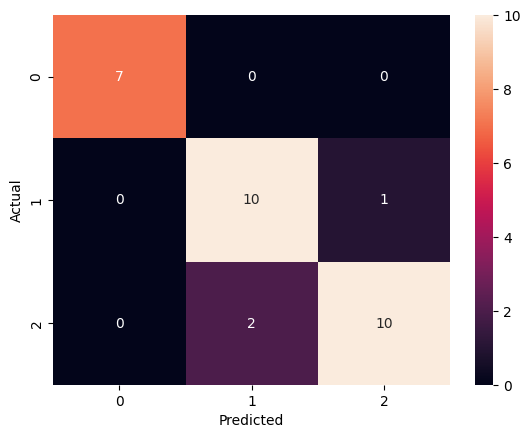

In [70]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")